# LSTM by tensorflow

In [1]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -Linear model with short distance

## Step 1:  Load the data

Let's create a data

For y, we will label in either 0 or 1.  For a 3 dimension vector, we have 8 quadrants.  We label them opposite 4 quadrants with 1, and other 4 quadrants with 0.  

In [2]:
def get_label(x, i1, i2, i3):
  # x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

In [3]:
T = 10
D = 1
X = []
Y = []

for t in range(5000):
    x = np.random.randn(T)
    X.append(x)
    y = get_label(x, -1, -2, -3) # short distance
#   y = get_label(x, 0, 1, 2) # long distance
    Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

## Step 2 : Build the model

Let's build a linear model.  

In [4]:
i = Input(shape=(T,))
x = Dense(1, activation = 'sigmoid')(i)

model = Model(i,x)

In [5]:
model.compile(loss = 'binary_crossentropy', optimizer = Adam(lr = 0.01), metrics=['accuracy'])

## Step 3: Train

In [6]:
r = model.fit(X, Y, epochs = 100, validation_split = 0.5)

Epoch 1/100
79/79 [==============================] - 0s 3ms/step - loss: 0.7475 - accuracy: 0.5208 - val_loss: 0.7055 - val_accuracy: 0.5076
Epoch 2/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.5132 - val_loss: 0.6944 - val_accuracy: 0.4948
Epoch 3/100
79/79 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.4848 - val_loss: 0.6952 - val_accuracy: 0.5084
Epoch 4/100
79/79 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.5160 - val_loss: 0.6946 - val_accuracy: 0.4912
Epoch 5/100
79/79 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5056 - val_loss: 0.6942 - val_accuracy: 0.4900
Epoch 6/100
79/79 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.5040 - val_loss: 0.6945 - val_accuracy: 0.4928
Epoch 7/100
79/79 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5028 - val_loss: 0.6952 - val_accuracy: 0.5000
Epoch 8/100
7

79/79 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5132 - val_loss: 0.6943 - val_accuracy: 0.5024
Epoch 59/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4964 - val_loss: 0.6958 - val_accuracy: 0.4976
Epoch 60/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5152 - val_loss: 0.6964 - val_accuracy: 0.5016
Epoch 61/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5208 - val_loss: 0.6942 - val_accuracy: 0.5076
Epoch 62/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5052 - val_loss: 0.6937 - val_accuracy: 0.4768
Epoch 63/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4988 - val_loss: 0.6942 - val_accuracy: 0.4952
Epoch 64/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5084 - val_loss: 0.6936 - val_accuracy: 0.4876
Epoch 65/100
79/79 

## Step 4: Evaluation

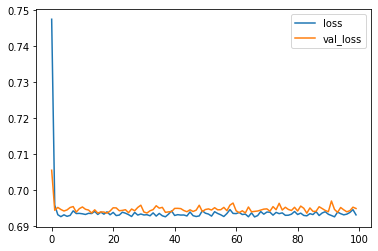

In [7]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

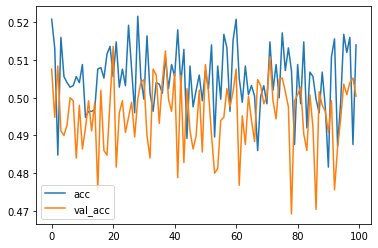

In [8]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

## Step 5: Prediction

It is quite useless to make a prediction since the accuracy is so poor.  

# -Simple RNN model with short distance

## Step 1: Load the data

We will use the same data. Only difference is we need to change the dimesion of X to $N \times T \times D$.  

In [9]:
print(X.shape)
inputs = np.expand_dims(X, -1)
print(inputs.shape)

(5000, 10)
(5000, 10, 1)


## Step 2: Build the model

We choose $M = 5$, the number of nodes in hidden layer. 

In [10]:
M = 5

i = Input(shape=(T,D))
x = SimpleRNN(M)(i)
x = Dense(1, activation='sigmoid')(x)

model = Model(i,x)

model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'],)

## Step 3: Train

In [11]:
r = model.fit(inputs, Y, epochs = 200, validation_split = 0.5,)

Epoch 1/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6453 - accuracy: 0.6620 - val_loss: 0.5889 - val_accuracy: 0.7864
Epoch 2/200
79/79 [==============================] - 0s 4ms/step - loss: 0.5159 - accuracy: 0.8324 - val_loss: 0.4537 - val_accuracy: 0.8644
Epoch 3/200
79/79 [==============================] - 0s 4ms/step - loss: 0.3944 - accuracy: 0.8936 - val_loss: 0.3584 - val_accuracy: 0.9084
Epoch 4/200
79/79 [==============================] - 0s 4ms/step - loss: 0.3153 - accuracy: 0.9264 - val_loss: 0.2925 - val_accuracy: 0.9232
Epoch 5/200
79/79 [==============================] - 0s 3ms/step - loss: 0.2605 - accuracy: 0.9428 - val_loss: 0.2487 - val_accuracy: 0.9400
Epoch 6/200
79/79 [==============================] - 0s 4ms/step - loss: 0.2215 - accuracy: 0.9512 - val_loss: 0.2126 - val_accuracy: 0.9564
Epoch 7/200
79/79 [==============================] - 0s 4ms/step - loss: 0.1953 - accuracy: 0.9560 - val_loss: 0.1929 - val_accuracy: 0.9548
Epoch 8/200
7

Epoch 59/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0579 - accuracy: 0.9788 - val_loss: 0.0641 - val_accuracy: 0.9776
Epoch 60/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0571 - accuracy: 0.9832 - val_loss: 0.0613 - val_accuracy: 0.9808
Epoch 61/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0542 - accuracy: 0.9840 - val_loss: 0.0585 - val_accuracy: 0.9856
Epoch 62/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0512 - accuracy: 0.9860 - val_loss: 0.0620 - val_accuracy: 0.9768
Epoch 63/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0528 - accuracy: 0.9828 - val_loss: 0.0616 - val_accuracy: 0.9832
Epoch 64/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0561 - accuracy: 0.9828 - val_loss: 0.0596 - val_accuracy: 0.9808
Epoch 65/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0504 - accuracy: 0.9880 - val_loss: 0.0597 - val_accuracy: 0.9860
Epoch 

79/79 [==============================] - 0s 5ms/step - loss: 0.0391 - accuracy: 0.9880 - val_loss: 0.0595 - val_accuracy: 0.9800
Epoch 117/200
79/79 [==============================] - 0s 5ms/step - loss: 0.0382 - accuracy: 0.9844 - val_loss: 0.0605 - val_accuracy: 0.9812
Epoch 118/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0403 - accuracy: 0.9840 - val_loss: 0.0582 - val_accuracy: 0.9772
Epoch 119/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0394 - accuracy: 0.9868 - val_loss: 0.0589 - val_accuracy: 0.9776
Epoch 120/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0403 - accuracy: 0.9848 - val_loss: 0.0535 - val_accuracy: 0.9828
Epoch 121/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0387 - accuracy: 0.9848 - val_loss: 0.0606 - val_accuracy: 0.9804
Epoch 122/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0384 - accuracy: 0.9860 - val_loss: 0.0574 - val_accuracy: 0.9836
Epoch 123/200

79/79 [==============================] - 0s 4ms/step - loss: 0.0321 - accuracy: 0.9896 - val_loss: 0.0573 - val_accuracy: 0.9796
Epoch 174/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0336 - accuracy: 0.9876 - val_loss: 0.0447 - val_accuracy: 0.9844
Epoch 175/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0335 - accuracy: 0.9876 - val_loss: 0.0544 - val_accuracy: 0.9756
Epoch 176/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0358 - accuracy: 0.9864 - val_loss: 0.0543 - val_accuracy: 0.9788
Epoch 177/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0350 - accuracy: 0.9880 - val_loss: 0.0429 - val_accuracy: 0.9872
Epoch 178/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0340 - accuracy: 0.9876 - val_loss: 0.0440 - val_accuracy: 0.9864
Epoch 179/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0357 - accuracy: 0.9868 - val_loss: 0.0461 - val_accuracy: 0.9824
Epoch 180/200

## Step 4: Evaluate

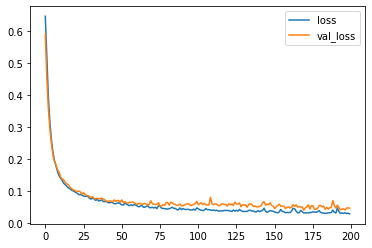

In [12]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

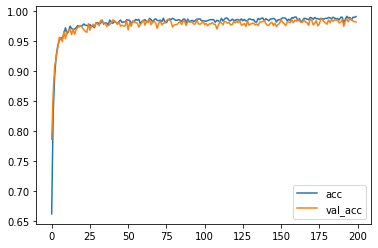

In [13]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

## Step 5: Make a prediction

In [14]:
some_point = np.random.randn(10)

print(some_point)
print(some_point.shape)
inputs = some_point.reshape(1,10,1)
print(some_point.shape)

[-0.28320121 -0.71066773  2.1218245   1.14398918  2.5164379  -0.48614189
  0.0265781   2.73317086  0.29344973  1.86331296]
(10,)
(10,)


In [15]:
model.predict(inputs)[0][0]

1.4851363e-10

In [16]:
get_label(some_point, -1,-2,-3)

0

# -Simple RNN with long distance

## Step 1: Load the data 

Let's create some data again.  

In [17]:
T = 10
D = 1
X = []
Y = []

for t in range(5000):
    x = np.random.randn(T)
    X.append(x)
     
    y = get_label(x, 0, 1, 2) # long distance
    Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [18]:
inputs = X.reshape(-1, T, D)
print(inputs.shape)

(5000, 10, 1)


## Step 2: Build the model

In [19]:
print(X[0], Y[0])

[-0.35128563 -0.65103812  0.97231697 -1.43029173 -0.73407635 -1.46559817
  1.15986648  0.74934364  0.40546437  0.5457104 ] 0


In [20]:
M = 5
K = 1

i = Input(shape=(T,D))
x = SimpleRNN(M)(i)
x = Dense(K, activation = 'sigmoid')(x)

model = Model(i,x)

model.compile(loss = 'binary_crossentropy', optimizer = Adam(lr = 0.01), metrics = ['accuracy'])

## Step 3: Train

In [21]:
r = model.fit(X, Y, epochs = 200, validation_split = 0.5)

Epoch 1/200
79/79 [==============================] - 1s 11ms/step - loss: 0.7061 - accuracy: 0.5004 - val_loss: 0.6968 - val_accuracy: 0.4900
Epoch 2/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5176 - val_loss: 0.6958 - val_accuracy: 0.4844
Epoch 3/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6928 - accuracy: 0.5188 - val_loss: 0.6986 - val_accuracy: 0.4872
Epoch 4/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6922 - accuracy: 0.5288 - val_loss: 0.6953 - val_accuracy: 0.4920
Epoch 5/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6917 - accuracy: 0.5188 - val_loss: 0.6969 - val_accuracy: 0.5020
Epoch 6/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6903 - accuracy: 0.5272 - val_loss: 0.7006 - val_accuracy: 0.4988
Epoch 7/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6921 - accuracy: 0.5212 - val_loss: 0.6973 - val_accuracy: 0.5040
Epoch 8/200


Epoch 59/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0662 - accuracy: 0.9860 - val_loss: 0.0398 - val_accuracy: 0.9904
Epoch 60/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0521 - accuracy: 0.9860 - val_loss: 0.0628 - val_accuracy: 0.9852
Epoch 61/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0549 - accuracy: 0.9876 - val_loss: 0.0502 - val_accuracy: 0.9896
Epoch 62/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0458 - accuracy: 0.9880 - val_loss: 0.0495 - val_accuracy: 0.9880
Epoch 63/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0598 - accuracy: 0.9860 - val_loss: 0.0400 - val_accuracy: 0.9896
Epoch 64/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0719 - accuracy: 0.9832 - val_loss: 0.0605 - val_accuracy: 0.9856
Epoch 65/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0720 - accuracy: 0.9816 - val_loss: 0.0591 - val_accuracy: 0.9848
Epoch 

79/79 [==============================] - 0s 4ms/step - loss: 0.0797 - accuracy: 0.9836 - val_loss: 0.0440 - val_accuracy: 0.9924
Epoch 117/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0765 - accuracy: 0.9836 - val_loss: 0.0426 - val_accuracy: 0.9908
Epoch 118/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0513 - accuracy: 0.9896 - val_loss: 0.0421 - val_accuracy: 0.9904
Epoch 119/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0439 - accuracy: 0.9924 - val_loss: 0.0399 - val_accuracy: 0.9928
Epoch 120/200
79/79 [==============================] - 0s 5ms/step - loss: 0.0481 - accuracy: 0.9912 - val_loss: 0.0572 - val_accuracy: 0.9880
Epoch 121/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0795 - accuracy: 0.9820 - val_loss: 0.4748 - val_accuracy: 0.8932
Epoch 122/200
79/79 [==============================] - 0s 4ms/step - loss: 0.1207 - accuracy: 0.9688 - val_loss: 0.0500 - val_accuracy: 0.9900
Epoch 123/200

79/79 [==============================] - 0s 4ms/step - loss: 0.0387 - accuracy: 0.9936 - val_loss: 0.0454 - val_accuracy: 0.9908
Epoch 174/200
79/79 [==============================] - 0s 4ms/step - loss: 0.3959 - accuracy: 0.8884 - val_loss: 0.0788 - val_accuracy: 0.9876
Epoch 175/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0609 - accuracy: 0.9892 - val_loss: 0.1010 - val_accuracy: 0.9768
Epoch 176/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0529 - accuracy: 0.9900 - val_loss: 0.0796 - val_accuracy: 0.9836
Epoch 177/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0513 - accuracy: 0.9904 - val_loss: 0.0522 - val_accuracy: 0.9904
Epoch 178/200
79/79 [==============================] - 0s 4ms/step - loss: 0.3367 - accuracy: 0.9048 - val_loss: 0.3074 - val_accuracy: 0.9120
Epoch 179/200
79/79 [==============================] - 0s 4ms/step - loss: 0.1836 - accuracy: 0.9520 - val_loss: 0.0939 - val_accuracy: 0.9812
Epoch 180/200

## Step 4: Evaluate

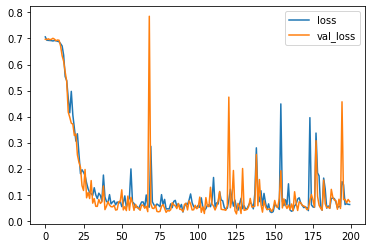

In [22]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

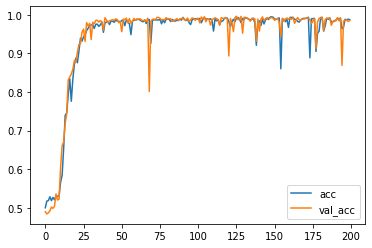

In [23]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

## Step 5: Make a prediction

The accuracy is not good, so prediction is not necessary.  

Note that the Simple RNN did good work for short distance, but not for long distance.  

# -LSTM and GlobalMaxPooling with long distance

## Step 1: Load the data

We will use the same data

## Step 2: Build the model

return_sequences = True returns all hidden states $h_1, h_2, h_3, \cdots h_T$.  So it has more memories.  

GlobalMaxPooling1D() does from $h_1, h_2, h_3, \cdots h_T$, which is $T \times M$ matrix, it squashes to $1 \times M$ matrix by taking only max values.   

In [24]:
i = Input(shape = (T,D))
x = LSTM(5, return_sequences = True)(i)
x = GlobalMaxPool1D()(x)
x = Dense(1, activation = 'sigmoid')(x)

model = Model(i,x)
model.compile(loss = 'binary_crossentropy', optimizer = Adam(lr = 0.01), metrics = ['accuracy'])

## Step 3: Train

In [25]:
inputs = X.reshape(-1, T, D)
print(inputs.shape)

(5000, 10, 1)


In [26]:
r = model.fit(inputs, Y, epochs = 400, validation_split = 0.5)

Epoch 1/400
79/79 [==============================] - 1s 14ms/step - loss: 0.6940 - accuracy: 0.5168 - val_loss: 0.6949 - val_accuracy: 0.4932
Epoch 2/400
79/79 [==============================] - ETA: 0s - loss: 0.6929 - accuracy: 0.51 - 0s 6ms/step - loss: 0.6927 - accuracy: 0.5184 - val_loss: 0.6938 - val_accuracy: 0.4932
Epoch 3/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6915 - accuracy: 0.5176 - val_loss: 0.6952 - val_accuracy: 0.4932
Epoch 4/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6894 - accuracy: 0.5252 - val_loss: 0.6940 - val_accuracy: 0.4936
Epoch 5/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6856 - accuracy: 0.5332 - val_loss: 0.6894 - val_accuracy: 0.5252
Epoch 6/400
79/79 [==============================] - 1s 7ms/step - loss: 0.6803 - accuracy: 0.5620 - val_loss: 0.6790 - val_accuracy: 0.5756
Epoch 7/400
79/79 [==============================] - 1s 7ms/step - loss: 0.6669 - accuracy: 0.5872 - val_loss: 

79/79 [==============================] - 0s 6ms/step - loss: 0.3350 - accuracy: 0.8432 - val_loss: 0.2510 - val_accuracy: 0.9008
Epoch 59/400
79/79 [==============================] - 1s 6ms/step - loss: 0.1957 - accuracy: 0.9384 - val_loss: 0.1717 - val_accuracy: 0.9408
Epoch 60/400
79/79 [==============================] - 0s 6ms/step - loss: 0.1330 - accuracy: 0.9588 - val_loss: 0.1561 - val_accuracy: 0.9556
Epoch 61/400
79/79 [==============================] - 0s 6ms/step - loss: 0.1183 - accuracy: 0.9700 - val_loss: 0.1306 - val_accuracy: 0.9652
Epoch 62/400
79/79 [==============================] - 0s 6ms/step - loss: 0.1118 - accuracy: 0.9716 - val_loss: 0.1273 - val_accuracy: 0.9656
Epoch 63/400
79/79 [==============================] - 0s 5ms/step - loss: 0.1043 - accuracy: 0.9760 - val_loss: 0.1246 - val_accuracy: 0.9660
Epoch 64/400
79/79 [==============================] - 0s 6ms/step - loss: 0.0976 - accuracy: 0.9784 - val_loss: 0.1198 - val_accuracy: 0.9680
Epoch 65/400
79/79 

Epoch 116/400
79/79 [==============================] - 0s 6ms/step - loss: 0.2961 - accuracy: 0.8360 - val_loss: 0.3015 - val_accuracy: 0.8484
Epoch 117/400
79/79 [==============================] - 0s 6ms/step - loss: 0.2855 - accuracy: 0.8592 - val_loss: 0.2850 - val_accuracy: 0.8504
Epoch 118/400
79/79 [==============================] - 0s 6ms/step - loss: 0.2745 - accuracy: 0.8560 - val_loss: 0.2817 - val_accuracy: 0.8564
Epoch 119/400
79/79 [==============================] - 1s 6ms/step - loss: 0.2698 - accuracy: 0.8616 - val_loss: 0.2734 - val_accuracy: 0.8564
Epoch 120/400
79/79 [==============================] - 0s 6ms/step - loss: 0.2615 - accuracy: 0.8616 - val_loss: 0.2656 - val_accuracy: 0.8636
Epoch 121/400
79/79 [==============================] - 1s 6ms/step - loss: 0.2564 - accuracy: 0.8612 - val_loss: 0.2625 - val_accuracy: 0.8608
Epoch 122/400
79/79 [==============================] - 0s 6ms/step - loss: 0.2514 - accuracy: 0.8664 - val_loss: 0.2613 - val_accuracy: 0.8652

79/79 [==============================] - 0s 6ms/step - loss: 0.0303 - accuracy: 0.9904 - val_loss: 0.0329 - val_accuracy: 0.9876
Epoch 174/400
79/79 [==============================] - ETA: 0s - loss: 0.0230 - accuracy: 0.99 - 0s 6ms/step - loss: 0.0236 - accuracy: 0.9956 - val_loss: 0.0375 - val_accuracy: 0.9856
Epoch 175/400
79/79 [==============================] - 0s 6ms/step - loss: 0.0224 - accuracy: 0.9952 - val_loss: 0.0302 - val_accuracy: 0.9904
Epoch 176/400
79/79 [==============================] - 0s 6ms/step - loss: 0.0209 - accuracy: 0.9948 - val_loss: 0.0322 - val_accuracy: 0.9872
Epoch 177/400
79/79 [==============================] - 0s 6ms/step - loss: 0.0268 - accuracy: 0.9920 - val_loss: 0.0388 - val_accuracy: 0.9840
Epoch 178/400
79/79 [==============================] - 0s 6ms/step - loss: 0.0247 - accuracy: 0.9924 - val_loss: 0.0422 - val_accuracy: 0.9832
Epoch 179/400
79/79 [==============================] - 0s 5ms/step - loss: 0.0263 - accuracy: 0.9920 - val_loss: 0

79/79 [==============================] - 0s 6ms/step - loss: 0.0568 - accuracy: 0.9840 - val_loss: 0.0782 - val_accuracy: 0.9768
Epoch 231/400
79/79 [==============================] - 0s 6ms/step - loss: 0.0464 - accuracy: 0.9864 - val_loss: 0.0734 - val_accuracy: 0.9780
Epoch 232/400
79/79 [==============================] - 0s 6ms/step - loss: 0.0436 - accuracy: 0.9880 - val_loss: 0.0660 - val_accuracy: 0.9788
Epoch 233/400
79/79 [==============================] - 0s 6ms/step - loss: 0.0322 - accuracy: 0.9904 - val_loss: 0.0542 - val_accuracy: 0.9824
Epoch 234/400
79/79 [==============================] - 1s 8ms/step - loss: 0.0217 - accuracy: 0.9932 - val_loss: 0.0525 - val_accuracy: 0.9840
Epoch 235/400
79/79 [==============================] - 1s 8ms/step - loss: 0.0199 - accuracy: 0.9936 - val_loss: 0.0544 - val_accuracy: 0.9808
Epoch 236/400
79/79 [==============================] - 1s 7ms/step - loss: 0.0220 - accuracy: 0.9936 - val_loss: 0.0429 - val_accuracy: 0.9864
Epoch 237/400

79/79 [==============================] - 0s 6ms/step - loss: 0.0120 - accuracy: 0.9960 - val_loss: 0.0322 - val_accuracy: 0.9868
Epoch 288/400
79/79 [==============================] - 0s 6ms/step - loss: 0.0097 - accuracy: 0.9964 - val_loss: 0.0309 - val_accuracy: 0.9872
Epoch 289/400
79/79 [==============================] - 0s 6ms/step - loss: 0.0092 - accuracy: 0.9964 - val_loss: 0.0285 - val_accuracy: 0.9876
Epoch 290/400
79/79 [==============================] - 0s 6ms/step - loss: 0.0102 - accuracy: 0.9952 - val_loss: 0.0291 - val_accuracy: 0.9884
Epoch 291/400
79/79 [==============================] - 0s 6ms/step - loss: 0.0088 - accuracy: 0.9960 - val_loss: 0.0277 - val_accuracy: 0.9888
Epoch 292/400
79/79 [==============================] - 0s 6ms/step - loss: 0.0100 - accuracy: 0.9948 - val_loss: 0.0286 - val_accuracy: 0.9876
Epoch 293/400
79/79 [==============================] - 0s 5ms/step - loss: 0.0096 - accuracy: 0.9956 - val_loss: 0.0257 - val_accuracy: 0.9888
Epoch 294/400

79/79 [==============================] - 0s 4ms/step - loss: 0.0030 - accuracy: 0.9992 - val_loss: 0.0188 - val_accuracy: 0.9924
Epoch 345/400
79/79 [==============================] - 0s 4ms/step - loss: 0.0031 - accuracy: 0.9996 - val_loss: 0.0186 - val_accuracy: 0.9928
Epoch 346/400
79/79 [==============================] - 0s 4ms/step - loss: 0.0030 - accuracy: 0.9996 - val_loss: 0.0176 - val_accuracy: 0.9932
Epoch 347/400
79/79 [==============================] - 0s 4ms/step - loss: 0.0030 - accuracy: 0.9992 - val_loss: 0.0185 - val_accuracy: 0.9940
Epoch 348/400
79/79 [==============================] - 0s 4ms/step - loss: 0.0030 - accuracy: 0.9996 - val_loss: 0.0180 - val_accuracy: 0.9936
Epoch 349/400
79/79 [==============================] - 0s 4ms/step - loss: 0.0026 - accuracy: 0.9996 - val_loss: 0.0174 - val_accuracy: 0.9940
Epoch 350/400
79/79 [==============================] - 0s 4ms/step - loss: 0.0029 - accuracy: 0.9996 - val_loss: 0.0176 - val_accuracy: 0.9928
Epoch 351/400

## Step 4:  Evaluate

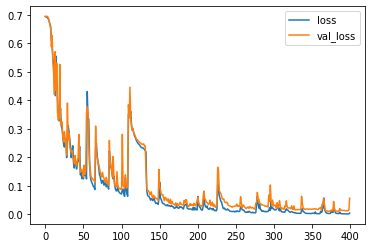

In [27]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

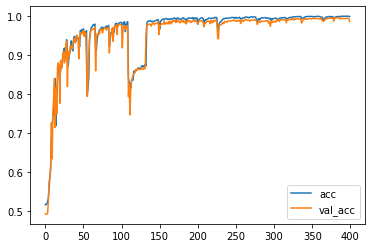

In [28]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

## Step 5: Prediction

Let's skip the prediction.  It has very nice accuracy.  So LSTM performs pretty well.  

#### Note:

we can change $T = 20, 30$ and see how it works.  Also test GRU for the performance.  However, LSTM usually performs better.  